<a href="https://colab.research.google.com/github/engrwaseemakhtar/Air-Ground-Federated-Learning/blob/main/Air_Ground_Integrated_Low_Energy_Federated_Learning_for_Secure_6G_Communications_General.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

7/7 [==============================] - 0s 5ms/step
Round 0, Accuracy: 0.8350
7/7 [==============================] - 0s 2ms/step
Round 10, Accuracy: 0.9000
7/7 [==============================] - 0s 2ms/step
Round 20, Accuracy: 0.9100
7/7 [==============================] - 0s 3ms/step
Round 30, Accuracy: 0.8950
7/7 [==============================] - 0s 2ms/step
Round 40, Accuracy: 0.9050
7/7 [==============================] - 0s 2ms/step
Round 50, Accuracy: 0.9100
7/7 [==============================] - 0s 2ms/step
Round 60, Accuracy: 0.9050
7/7 [==============================] - 0s 2ms/step
Round 70, Accuracy: 0.9100
7/7 [==============================] - 0s 2ms/step
Round 80, Accuracy: 0.9100
7/7 [==============================] - 0s 3ms/step
Round 90, Accuracy: 0.9100
7/7 [==============================] - 0s 2ms/step


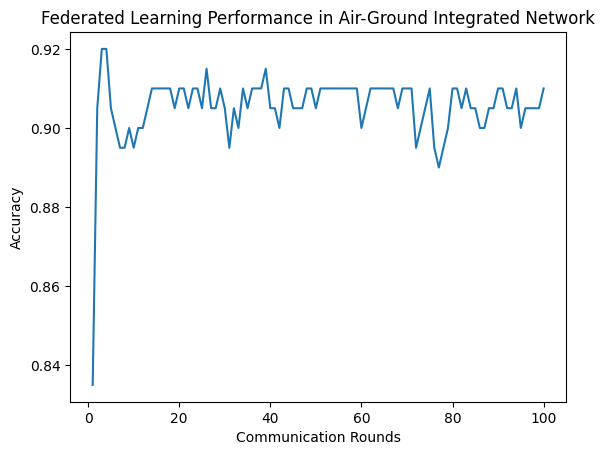

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense

# 1. Set up the simulation environment
np.random.seed(0)
n_clients = 10
n_rounds = 100
n_local_epochs = 5
learning_rate = 0.01

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Split data among clients
client_data = np.array_split(X_train, n_clients)
client_labels = np.array_split(y_train, n_clients)

# 2. Implement federated learning algorithm
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(20,)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def train_client(model, data, labels, epochs):
    model.fit(data, labels, epochs=epochs, verbose=0)
    return model.get_weights()

def aggregate_weights(weights_list):
    return [np.mean(weights, axis=0) for weights in zip(*weights_list)]

# 3. Model air-ground integrated network
class AirGroundNetwork:
    def __init__(self, n_clients, failure_rate=0.1, energy_constraint=0.8):
        self.n_clients = n_clients
        self.failure_rate = failure_rate
        self.energy_constraint = energy_constraint

    def simulate_communication(self):
        return np.random.rand(self.n_clients) > self.failure_rate

    def apply_energy_constraint(self, weights):
        return [w * self.energy_constraint for w in weights]

# 4. Implement security measures (simplified)
def add_noise(weights, noise_level=0.01):
    return [w + np.random.normal(0, noise_level, w.shape) for w in weights]

# 5. Run simulation and collect results
network = AirGroundNetwork(n_clients)
global_model = create_model()
global_weights = global_model.get_weights()

accuracies = []

for round in range(n_rounds):
    client_weights = []
    successful_communication = network.simulate_communication()

    for client in range(n_clients):
        if successful_communication[client]:
            local_model = create_model()
            local_model.set_weights(global_weights)
            client_w = train_client(local_model, client_data[client], client_labels[client], n_local_epochs)
            client_w = network.apply_energy_constraint(client_w)
            client_w = add_noise(client_w)  # Apply differential privacy
            client_weights.append(client_w)

    if client_weights:
        global_weights = aggregate_weights(client_weights)
        global_model.set_weights(global_weights)

        # Evaluate global model
        y_pred = global_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred.round())
        accuracies.append(accuracy)

        if round % 10 == 0:
            print(f"Round {round}, Accuracy: {accuracy:.4f}")

# Plot results
plt.plot(range(1, n_rounds+1), accuracies)
plt.xlabel('Communication Rounds')
plt.ylabel('Accuracy')
plt.title('Federated Learning Performance in Air-Ground Integrated Network')
plt.show()